# Model Evaluation & Hyperparameter Tuning

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [53]:
df1 = pd.read_csv('employee_data_scaled.csv')

In [54]:
df1

,EmployeeNumber,Attrition_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
0,1,1,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4,1,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,5,0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7,0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,8,0,0.333333,0.646385,0.035714,0.25,1.000000,0.700000,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1106,1,0.166667,0.799571,0.107143,0.00,1.000000,0.028571,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1466,1185,0,0.404762,0.382248,0.107143,0.75,1.000000,0.242857,0.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1467,1196,0,0.452381,0.626342,0.000000,0.50,1.000000,0.371429,0.333333,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1468,1474,0,0.523810,0.568361,0.035714,0.50,0.666667,0.542857,0.666667,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [55]:

df2 = df1.corr()

In [56]:
df2.loc['Attrition_Yes'].sort_values(ascending=False)

Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.094361
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
JobRole_Laboratory Tech              0.059511
JobRole_Research scntist             0.059511
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
IsMale                               0.028681
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.014940
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.004254
HourlyRate                        

In [57]:
df1['Attrition_Yes'].value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

In [58]:
sm_model = sm.OLS(df1['Attrition_Yes'],df1.drop(['Attrition_Yes'],axis=1))
sm_model1= sm_model.fit()
sm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Attrition_Yes   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     10.12
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           9.18e-64
Time:                        22:49:04   Log-Likelihood:                -391.14
No. Observations:                1470   AIC:                             884.3
Df Residuals:                    1419   BIC:                             1154.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
EmployeeNumber                    -5.553e-06   1.42e-05     -0.390      0.696   -3.35e-05    2.23e-05
Age                                  -0.1456      0.056     -2.612      0.009      -0.255      -0.036
DailyRate                            -0.0353      0.030     -1.193      0.233      -0.093       0.023
DistanceFromHome                      0.1028      0.029      3.509      0.000       0.045       0.160
Education                             0.0060      0.034      0.177      0.860      -0.061       0.073
EnvironmentSatisfaction              -0.1202      0.023     -5.137      0.000      -0.166      -0.074
HourlyRate                           -0.0147      0.029     -0.501      0.617      -0.072       0.043
JobInvolvement                       -0.1726      0.036     -4.805      0.000      -0.243      -0.102
JobLevel                             -0.0048      0.110     -0.043      0.966      -0.221       0.211
JobSatisfaction                      -0.1107      0.023     -4.782      0.000      -0.156      -0.065
NumCompaniesWorked                    0.1544      0.034      4.510      0.000       0.087       0.222
PercentSalaryHike                    -0.0320      0.051     -0.622      0.534      -0.133       0.069
PerformanceRating                     0.0202      0.037      0.545      0.586      -0.053       0.093
RelationshipSatisfaction             -0.0683      0.024     -2.881      0.004      -0.115      -0.022
StockOptionLevel                     -0.0502      0.041     -1.225      0.221      -0.130       0.030
TotalWorkingYears                    -0.1409      0.096     -1.462      0.144      -0.330       0.048
TrainingTimesLastYear                -0.0799      0.040     -2.003      0.045      -0.158      -0.002
WorkLifeBalance                      -0.0919      0.036     -2.541      0.011      -0.163      -0.021
YearsAtCompany                        0.2214      0.120      1.848      0.065      -0.014       0.457
YearsInCurrentRole                   -0.1664      0.070     -2.388      0.017      -0.303      -0.030
YearsSinceLastPromotion               0.1627      0.052      3.157      0.002       0.062       0.264
YearsWithCurrManager                 -0.1631      0.067     -2.420      0.016      -0.295      -0.031
MonthlyRate                           0.0105      0.030      0.354      0.723      -0.048       0.069
MonthlyIncome                        -0.0078      0.132     -0.059      0.953      -0.267       0.251
BusinessTravel_Non-Travel             0.0644      0.026      2.436      0.015       0.013       0.116
BusinessTravel_Travel_Frequently      0.2173      0.024      9.196      0.000       0.171       0.264
BusinessTravel_Travel_Rarely          0.1292      0.020      6.390      0.000       0.090       0.169
Department_Human Resour

# Splitting data into train and Test

In [59]:
X = df1.drop(['Attrition_Yes'],axis=1)
y = df1['Attrition_Yes']

In [60]:
X

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
0,1,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,5,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,8,0.333333,0.646385,0.035714,0.25,1.000000,0.700000,0.666667,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1106,0.166667,0.799571,0.107143,0.00,1.000000,0.028571,0.666667,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1466,1185,0.404762,0.382248,0.107143,0.75,1.000000,0.242857,0.333333,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1467,1196,0.452381,0.626342,0.000000,0.50,1.000000,0.371429,0.333333,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1468,1474,0.523810,0.568361,0.035714,0.50,0.666667,0.542857,0.666667,0.00,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [61]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [62]:
X.iloc[293:]

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
293,407,0.428571,0.332140,0.607143,0.75,0.666667,0.728571,1.000000,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
294,408,0.785714,0.858984,0.035714,0.50,1.000000,0.771429,0.000000,0.25,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
295,410,0.547619,0.166070,0.035714,0.75,1.000000,0.828571,0.666667,0.75,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
296,411,0.000000,0.508232,0.321429,0.50,1.000000,0.557143,0.333333,0.00,0.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
297,412,0.238095,0.983536,0.535714,0.25,0.333333,0.542857,1.000000,0.25,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1106,0.166667,0.799571,0.107143,0.00,1.000000,0.028571,0.666667,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1466,1185,0.404762,0.382248,0.107143,0.75,1.000000,0.242857,0.333333,0.00,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1467,1196,0.452381,0.626342,0.000000,0.50,1.000000,0.371429,0.333333,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1468,1474,0.523810,0.568361,0.035714,0.50,0.666667,0.542857,0.666667,0.00,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [63]:
## StratifiedKFold (Testing out StratifiedKFold )

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

scores_logistic = []
scores_svm = []
scores_rf = []
scores_xgb =[]

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index],y.loc[train_index], y.loc[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
    #scores_xgb.append(get_score())

# KFold
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5)
#for train_index, test_index in kf.split(X,y):
#    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index],y.loc[train_index], y.loc[test_index]

In [64]:
scores_logistic,scores_svm,scores_rf

([0.9081632653061225,
  0.8809523809523809,
  0.8707482993197279,
  0.8775510204081632,
  0.8843537414965986],
 [0.8367346938775511,
  0.8367346938775511,
  0.7482993197278912,
  0.826530612244898,
  0.8401360544217688],
 [0.8469387755102041,
  0.8605442176870748,
  0.8639455782312925,
  0.8571428571428571,
  0.8571428571428571])

In [65]:
from sklearn.model_selection import train_test_split

In [168]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score
import warnings

In [67]:
warnings.filterwarnings("ignore")

In [68]:
cross_val_score(LogisticRegression(), X_train, y_train,cv=5)

array([0.90677966, 0.86382979, 0.85106383, 0.85957447, 0.87234043])

In [69]:
cross_val_score(SVC(),  X_train, y_train,cv=5)

array([0.83898305, 0.83829787, 0.83829787, 0.83829787, 0.83829787])

In [70]:
cross_val_score(RandomForestClassifier(), X, y,cv=5)

array([0.8537415 , 0.85714286, 0.86734694, 0.86394558, 0.8537415 ])

Based on this cross val score, Logistic Regression has the better score

# Hyper parameter tuning

In [71]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [72]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'max_features': ['auto', 'sqrt'],
            'n_estimators': [1,5,10,100],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'solver' : ['lbfgs','liblinear'],
            'C': [0.01,0.1,1,5,10],
            'penalty' : ['l2']
        }
    },
    'XGBoost_Classifier' : {
        'model': XGBClassifier(),
        'params': {
            'learning_rate' : [0.001,0.1,1],
            'n_estimators' : [100,500,1000],
            'max_depth' : [5,10]
        }
    }
}

In [73]:
## GridSearch CV

scores = []

for model_name, model_p in model_params.items():
    clf =  GridSearchCV(model_p['model'], model_p['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

[23:24:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

,model,best_score,best_params
0,svm,0.877533,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.861399,"{'max_features': 'auto', 'min_samples_leaf': 2..."
2,logistic_regression,0.870718,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}"
3,XGBoost_Classifier,0.857984,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


In [74]:
## RandomSearch CV
scores_rs=[]

for model_name, model_p in model_params.items():
    clf1 =  RandomizedSearchCV(model_p['model'], model_p['params'], cv=5, n_iter = 50,random_state=0)
    clf1.fit(X_train, y_train)
    scores_rs.append({
        'model': model_name,
        'best_score': clf1.best_score_,
        'best_params': clf1.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

[23:59:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

,model,best_score,best_params
0,svm,0.877533,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.861399,"{'max_features': 'auto', 'min_samples_leaf': 2..."
2,logistic_regression,0.870718,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}"
3,XGBoost_Classifier,0.857984,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."


__Logistic Regression shows better score than other models__

## Balancing the dataset


In [75]:
from imblearn.combine import SMOTETomek

In [76]:
df1['Attrition_Yes'].value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

In [78]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_train,y_train=smk.fit_sample(X_train, y_train)

In [79]:
X_train.shape, y_train.shape

((1836, 56), (1836,))

# Model Building

In [80]:
lr = LogisticRegression(C=10)

In [81]:
lr.fit(X_train, y_train)

LogisticRegression(C=10)

In [82]:
y_pred = lr.predict(X_test)

In [140]:

y_pred1 = lr.predict_proba(X_test)[:,1]  # all rows, column 1

ypred_threshold=np.zeros([len(y_test),1])
ypred_threshold[y_pred1>0.4 ]=1

In [97]:
ypred_threshold[:5,:]


array([[0.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [88]:
print (try1[:5,:])

[[0.16172382 0.83827618]
 [0.01027319 0.98972681]
 [0.34740106 0.65259894]
 [0.90976639 0.09023361]
 [0.46248508 0.53751492]]


# Evaluation Metrics

In [89]:
from sklearn.metrics import classification_report,confusion_matrix,average_precision_score,roc_curve, roc_auc_score

In [116]:
target_names = ['Not Attrition', 'Attrition']

In [141]:
print (classification_report(y_test,y_pred,target_names =target_names ))
print (classification_report(y_test,ypred_threshold,target_names =target_names))

               precision    recall  f1-score   support

Not Attrition       0.94      0.80      0.86       247
    Attrition       0.41      0.74      0.53        47

     accuracy                           0.79       294
    macro avg       0.68      0.77      0.70       294
 weighted avg       0.86      0.79      0.81       294

               precision    recall  f1-score   support

Not Attrition       0.95      0.72      0.82       247
    Attrition       0.36      0.81      0.49        47

     accuracy                           0.73       294
    macro avg       0.65      0.76      0.66       294
 weighted avg       0.86      0.73      0.77       294



In [142]:
cm = (confusion_matrix(y_test,y_pred))
cm1 = (confusion_matrix(y_test,ypred_threshold))
cm,cm1

(array([[197,  50],
        [ 12,  35]]),
 array([[178,  69],
        [  9,  38]]))

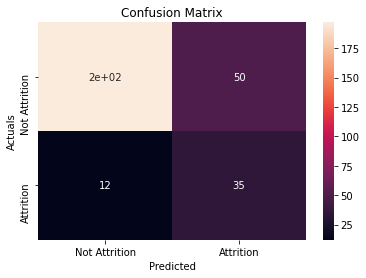

In [143]:

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actuals'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Attrition', 'Attrition']); ax.yaxis.set_ticklabels(['Not Attrition', 'Attrition']);

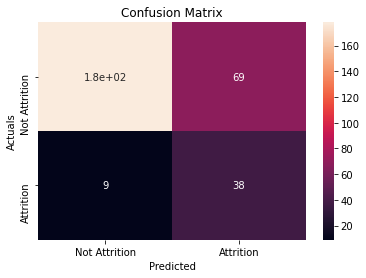

In [144]:

ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actuals'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Attrition', 'Attrition']); ax.yaxis.set_ticklabels(['Not Attrition', 'Attrition']);

In [145]:
average_precision_score(y_test, ypred_threshold)

0.31774686410654934

In [146]:
# Compute ROC curve
tn, fp, fn, tp = confusion_matrix(y_test, ypred_threshold).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')


True Positives: 38
False Positives: 69
True Negatives: 178
False Negatives: 9


__True Postive Rate(sensitivity)__
tpr = tp/(tp+fn)

__False Positive Rate(1- specificity)__
fpr = fp/(tn+fp)

In [31]:
tpr = tp/(tp+fn)
fpr = fp/(tn+fp)

In [147]:
print ('ROC AUC Score : ',roc_auc_score(y_test,ypred_threshold) )

ROC AUC Score :  0.7645792057886123


In [154]:
### Plot ROC curve

In [148]:
plt1_fpr,plt1_tpr,_ = roc_curve(y_test,ypred_threshold)
plt_fpr,plt_tpr,_ = roc_curve(y_test,y_pred1)

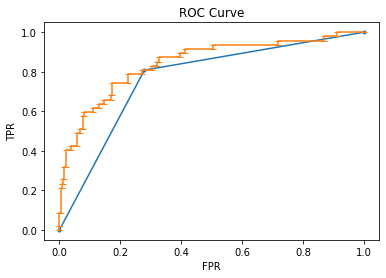

In [149]:
_=plt.plot(plt1_fpr,plt1_tpr,marker ='.')
_=plt.plot(plt_fpr,plt_tpr,marker ='_')
_=plt.title('ROC Curve')
_=plt.xlabel('FPR')
_=plt.ylabel('TPR')

** __I used Logistic Regression to solve the classification problem of identiifying the probability of employees getting attrition__

# Summary

1. Loading the dataset of cleaned data which is pre-processed
2. Using OLS , identify the key features 
3. Using StratifiedKFold, splitting the data into Train and Test dataset
4. HyperParameter Tuning on train dataset to identify the optimal parameters using GridSearchCV and RandomizedSearchCV
   Models tried:
    1. Logistic Regression
    2. Support Vector Machine
    3. Random Forest
    4. XGBoost Classsifier
    __Logistic Regression showed better score than other models with optimal parameters to be used__
6. Using SMOTETomek, balanced the dataset as the distribution is (0.84,0.16) for the target variable
7. Building the model, used Logistic Regression to fit the train dataset and predicted the values of test dataset
8. __HR likes to identify the people who are most likely to quit so they can talk to them and make them stay. So we need to tune the model to    decrease FalseNegative (which is TypeI error)__
   Using predict_proba, used the threshold of 70% to increase the Recall score/decrease the TypeI error

9. Evaluated the model using evaluation metrics like classification report, confusion matrix, false and true positive rate,
   ROC_AUC score